# Logistic Regression


Logistic regression or (logit regression), is a probabilistic classifier much like Naive Bayes. It classifiers the probability of a model falling between one of two classes and can generalize this strategy to perform a multiclassification as well.

Logistic regression takes the same exact approach as linear regression, both train for a linear set of weighted features. The major differences come from the logistic interpretation with the sigmoid function on top of the model.

## The Mechanics of Logistic Regression

$z$ is defined as the weighted sum of features, with bias weight $w_0$

$$z = w_0 + x_1 w_1 + x_2 w_2 + x_3 w_3 + \dots + x_n w_n = \sum_{i=0}^n x_i w_i = x w^T$$

These weighted sum of inputs are a part of another composite function y.

$$\hat{y} = P(y=1|x) = \frac{1}{1 + exp(-x w^T)}$$

**What do we have so far?**
 
$z$ is the weighted sum of features. This tells us that given some sample of $x$ (which is our data), and learned weights $w$, value $z$ is produced that can either be really high or low. Our data cannot change, so the value of $x$ cannot change. The only number have control over is $w$, which once set, is going to immediately define the behavior of everything else. For example, we can imagine that if a feature is unimportant, then its weight would be close to zero effectively ignoring the feature altogether since it has no affect on $z$.

Next, $z$ gets truncated into a value between 0 and 1 by the sigmoid function in order to be to become reinterpreted as a probability. First of all, why do we want this? We already have a way numerically capturing an input $x$ framed in the context of $w$. To answer this question, we need to get reminded of our goal. We want make a classification on $x$. This means that we need a way to map $x \mapsto [0, 1]$. $z$ currently just maps to $(-\infty, +\infty)$. Using a remapping into sigmoid ($\sigma$) gives as a reasonable way to make a classification. If its close to 1, we'll probably predict and 1, and vise-versa.

Ok, so there are an infinite number of equations that can remap the infinity domain between $[0, 1]$. Why sigmoid? The answer to this is probably more complicated then the way I'll frame it but lets think about the properties is provides.

* If $z$ is high, then $\sigma$ is 1.
* If $z$ is low, then $\sigma$ is 0.
* If $z$ is 0, then $\sigma$ is .5.

Reinterpretting this into a higher context, this is allow for $w$ to push $x$ to either one or the other end of the number line. A binary classification. Ok, but what are the consequences of giving it an exponential shape? And why is it mirrored?

Sigmoid is mirrored vertically, because we want to fairly reflect $w$ into making an either negative or positive classification. The exponential property is a little more tricky. What this essentially allows for is the mapping two really easily skew towards 0 or 1. Theres not much room in between, considering the full domain $x$ can map to. Give a set of training examples that have an output of 0 or 1, the goal is to formulate an equation that predicts negative examples to as close to 0 as possible and positive examples to as close to 1 as possible. To answer this in a deeper level, we'll have to understand how sigmoid fits into the context of the loss function.


**The Sigmoid Function**

The logistic function, or sigmoid function, which contains an "S" shaped curve - squishing _any_ input value, and outputting a value between 0 and 1. In logistic regression, the sigmoid makes our final prediction.

$$\hat{y} = P(y=1|x) = \sigma(x) = \frac{1}{1 + exp(-x w^T)}$$

$\hat{y}$ is usually a notation for "predicted y", our estimation for the real $y$.

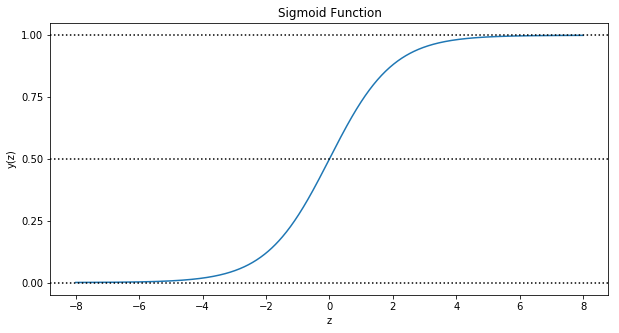

In [1]:
%matplotlib inline
from myutils.draw.math import sigmoid


sigmoid(fig_size=(10, 5))

**Finding $w$**

At this point, we have a way of justifying a prediction using $w$. But how can we find $w$ in an efficient way?

To find $w$, we need a way to characterize $X$ (our input) in relation our output $\hat{y}$. Doing this models a loss function in the process. What makes a loss function characteristic is how it reflect a correct a correct and incorrect classification.

$$J(w) = \frac{1}{m} \sum_{i=1}^m \frac{1}{2} (\hat{y}(x^{(i)}) - y^{(i)})^2$$

* (i) represents the ith training sample.
* $J$ is a function of the input vector $w$, and represent the overall cost or performance of the model.
* $y^{(i)}$ is the real classification (either 0 or 1)
* $\hat{y}(x^{(i)})$ is the result of our decision function that came from the sigmoid. This is the part that we want to be as close to 0 or 1, depending on true classification. The larger our prediction is from the true difference, the larger our error.
    * This difference is squared, so that larger differences are "punished" to a larger extent that smaller differences are.
* Finally the differences are averaged across $m$ samples.
* The $\frac{1}{2}$ is just a constant that effects every single classification, so relative difference does not change, so it is ok to put down. We'll see how this makes things mathematically more convenient later on.
* $J(w)$ is a non-convex function, meaning that there are possibly many local suboptimums, and no convergence to a _single_ global minimum.
    * For this reason, the cost function is redefined while maintaining the properties we discussed.


 
$$J(w) = \frac{1}{m} \sum_{i=1}^m -[(y^{(i)}log(\hat{y}(x^{(i)})) + (1-y^{(i)})log(\hat{y}(x^{(i)}))]$$

This is just a compact way of saying this: (they both equate to the same thing). It is written in a compact way to avoid having to deal with piece-wise derivatives later.

$$
    J(w)= 
\begin{cases}
    -log(\hat{y}(x^{(i)})), & \text{if } y^{(i)} = 1\\
    -log(1-\hat{y}(x^{(i)})), & \text{if } y^{(i)} = 0
\end{cases}
$$

* Lets try to understand why this is a logical thing to do. And why it still works.

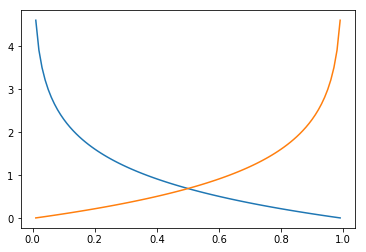

In [2]:
import numpy as np
from myutils.draw.math import plt_2d_functions


plt_2d_functions([lambda x: -np.log(x), lambda x: -np.log(1-x)], np.arange(0.01, .999, .01))

The graph above models $-log(x)$ and $-log(1-x)$ when $0 \leq x \leq 1$ (since x is limited by the output from sigmoid). These functions are mirrored on $x=.5$, so they measure the distance from 0 and 1 to the same degrees. The cost is infinitely high on both accounts incorrect classification. The complement is true vise-versa.

Additionally:
* The function is convex for the optimal model weights can be found.
* The derivative of logarithmic summations is a great simplification. $\frac{d}{dx}log_a(x) = \frac{\frac{d}{dx}(x)}{xln(a)}$, so $\frac{d}{dx} \sum_{i=0}^m log_a(x^{(i)}) = \frac{m}{xln(a)}$
    * When if we assume natural logarithms, then $\frac{d}{dx}log_e(x) = \frac{\frac{d}{dx}(x)}{xln(e)} = \frac{1}{x}$
    
To understand how to train the logistic regression model via gradient descent, refer to this [Chapter](todo). This chapter in particular will derive the conclusions we need for gradient descent.

## Putting it All Together

Recall that our goal is to find the _average_ cost among all the samples, rather than just a single sample. This is because we want to capture how the performance of the weights against a generalize set of inputs.

Fortunately for us, all the differentiation is since the sum of derivatives act independently from one another.

$$\nabla w_j = \frac{\partial}{\partial w_j} J(w) = \frac{1}{m} \sum_{i=0}^m (-y^{(i)} + \hat{y}(z^{(i)})) \cdot x_j^{(i)}$$

And finally, our update rule becomes $w := w + \eta \frac{1}{m} \sum_{i=0}^m (y^{(i)} - \hat{y}(z^{(i)})) \cdot x^{(i)}$, where $\eta$ is the learning rate. Notice the distributive flip in signs for simplification. Now that we have our update rule for the weights, after training through a substantial number of samples, we obtain our learn set of weights.

Using these weights, we can perform classification based on our original function from the start. 

$$
    y'= \frac{1}{1+exp(-w^{T}x')} =
\begin{cases}
    1, \text{if } y' \geq 0.5 \\ 
    0, \text{if } y' < 0.5 \\ 
\end{cases}
$$

Selecting 0.5 as the decision threshold is the default choice because it is the furthest distance from each class equally. This parameter can be changed of course, for example - to maximize auc under roc. It also can be adjusted manually to reduce false positive when the context demands it. For example, if the the decision threshold is .7, then the positive class has to be a lot more likely in order for the classification to take place. A similar effect can be seen in the opposite direction. For example, consider classifying patients on whether or not they have cancer. Naturally also false negatives (patients who where classified as not having cancer, but in reality did) would be bad news.

## Implementation

### Digression 1: Fitting an Intercept

When we fit an intercept or 'bias' to a model, what we are really doing is providing the flexibility of the model to move an additional dimension. Consider for example $y=mx$ that has a fixed slope rotating about $(0,0)$. Adding a bias $b$, provides the equation to move freely about the vertical axis $y=mx+b$.

In optimization, $b$ is really just a made up feature that is independent from the training samples. So suppose we have n features, $x_1, x_2, x_3, \dots, x_n$, and an associated set of weights for every feature $w_1, w_2, w_3, \dots, w_n$. If we want to add an additional feature $x_0$, we just need to treat it as 1 or $x_0^0 = 1$, now the associated weight $w_0$ becomes $w_0*(x_0^0)$ which simplifies to just $w_0$. So as a consequence of adding $x_0$ to be a constantly 1, we introduce an additive leverage into the model that always to be whatever it wants to be.

In linear algebra, this accounts to just stacking an additional column vector.


$$
\begin{bmatrix}
    x_{11} & x_{12} & x_{13} & \dots  & x_{1n} \\
    x_{21} & x_{22} & x_{23} & \dots  & x_{2n} \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    x_{d1} & x_{d2} & x_{d3} & \dots  & x_{dn}
\end{bmatrix}
\rightarrow
\begin{bmatrix}
    1 & x_{11} & x_{12} & x_{13} & \dots  & x_{1n} \\
    1 & x_{21} & x_{22} & x_{23} & \dots  & x_{2n} \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    1 & x_{d1} & x_{d2} & x_{d3} & \dots  & x_{dn}
\end{bmatrix}
$$




In [3]:
import timeit
from scipy import sparse


# Note: this implementation assumes sparse input matrix X

def sigmoid(x):
    """
    objective: squash input
    :param x: np.array - inputs
    :return: np.array - output
    """
    return 1.0 / (1 + np.exp(-x))


def _get_prediction(X, weights):
    """
    objective: compute y-hat given the samples and trained weights
    y_hat = 1 / 1 + exp(X*w^T)
    :param X: np.matrix - training sample features
    :param weights: np.array - trained weights for each X
    :return: np.array - probability of classification
    """
    return sigmoid(X@weights)


def _gd_single(X_train, y_train, weights, eta):
    """
    objective: single gradient descent step down
    w := w + eta/m sum_{0 to m} (y_i - y_hat(z_i)) * x_i
    :param X_train: np.matrix - training samples
    :param y_train: np.array - true classifications
    :param eta: float - learning rate
    """
    y_hat = _get_prediction(X_train, weights)
    m = y_train.shape[0]
    weights_delta = X_train.T@(y_train - y_hat)
    weights += (eta / float(m)) * weights_delta
    return weights


def _get_cost(X, y, weights):
    """
    objective: compute the cost J(w)
    J(w) = 1/m sum_{0 to m} -[(y_i)log(y_hat(x_i)) + (1-y_i)log(y_hat(x_i))]
    :param X: np.matrix - samples
    :param y: np.array - classifications
    :param weights: np.array - trained weights for each X
    :return: float - average cost all training samples
    """
    y_hat = _get_prediction(X, weights) 
    # (indexing from matrix to vector)
    return np.mean(-y * np.log(y_hat) - (1-y) * np.log(1-y_hat))


def train_logistic_regression(X_train, y_train, max_iter, eta, fit_intercept=False, keep_history=False):
    """
    objective: train a linear regression model
    :param X_train: np.matrix - training samples
    :param y_train: np.array - training classifications
    :param max_iter: int - number of gd steps
    :param eta: float - learning rate (vector scaler)
    :param fit_intercept: bool - include w_0 or not
    """
    # stack column vector for intercept
    if fit_intercept:
        intercept = np.ones((X_train.shape[0], 1))
        X_train = sparse.hstack((intercept, X_train))
    # initialize weights to the number of rows, if including w_0 
    weights = np.zeros(X_train.shape[1])
    w_history, cost = [], []
    for i in range(max_iter):
        # update the weights, print the updated cost every 1000 iterations
        weights = _gd_single(X_train, y_train, weights, eta)
        if keep_history:
            w_history.append(weights)
            cost.append(_get_cost(X_train, y_train, weights))
    if keep_history:
        return np.asarray(w_history), np.asarray(cost)
    else:
        return np.asarray(weights)


def predict(X, weights):
    """
    objective: entry point function get predictions of X, given trained weights
    :param X: np.matrix - samples
    :param weights: np.array - feature weights
    """
    # if the number of columsn dont match, then add the intercept column
    if X.shape[1] != weights.shape[0]:
        intercept = np.ones((X.shape[0], 1))
        X = sparse.hstack((intercept, X))
    return _get_prediction(X, weights)


In [4]:
# training sample
X_train = np.array([[6, 7],
                    [2, 4],
                    [3, 6],
                    [4, 7],
                    [1, 6],
                    [5, 2],
                    [2, 0],
                    [6, 3],
                    [4, 1],
                    [7, 2]])
X_train = sparse.csr_matrix(X_train)
y_train = np.array([0,0,0,0,0,1,1,1,1,1])

weights = train_logistic_regression(X_train, y_train, max_iter=1000, eta=0.1, 
                                    fit_intercept=True, keep_history=False)
print('Classification weights after 1000 iterations')
print(weights)

Classification weights after 1000 iterations
[ 0.4541707   1.97448332 -2.44069422]


In [5]:
# testing sample
X_test = np.array([[6, 1],
                   [1, 3],
                   [3, 1],
                   [4, 5]])
X_test = sparse.csr_matrix(X_test)

pred = predict(X_test, weights)
class_pred = pred >= 0.5
for p, c in zip(pred, class_pred):
    print(f'prediction: {p} -> {c}')

prediction: 0.9999478000270096 -> True
prediction: 0.007439911157784815 -> False
prediction: 0.980865201041308 -> True
prediction: 0.02080847023610398 -> False


## Click Through Prediction with Logistic Regression and Gradient Descent

Running our model on click data found on: https://www.kaggle.com/c/avazu-ctr-prediction/data

In [6]:
from myutils.config import config
import pandas as pd
import numpy as np
from os.path import join
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder


# read in data
DATA_DIR = join(config['data_dir'], 'click-rate-prediction')
click_df = pd.read_csv(join(DATA_DIR, 'train.csv'), nrows=2500)

# drop unnecessary columns for now
click_df.drop(['id', 'hour', 'device_id', 'device_ip'], axis=1, inplace=True)

# label encode
click_df = click_df.apply(LabelEncoder().fit_transform)

# split X and y into np matricies explicitly
col_names = list(click_df)
X_names, y_names = list(filter(lambda name: name != 'click', col_names)), ['click']
X, y = np.array(click_df[X_names]), np.array(click_df[y_names])

# one hot encoding for categorical distance constaint
X = OneHotEncoder(categories='auto').fit_transform(X)

# split X and y into training and test sets
y = y.reshape(1, len(y))[0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [7]:
from sklearn.metrics import roc_auc_score


# learn the weights
start_time = timeit.default_timer()
weights, cost = train_logistic_regression(X_train, y_train, max_iter=10000, 
                                          eta=0.01, fit_intercept=True, keep_history=True)
time_end = timeit.default_timer() - start_time
print(f'10000 training iterations completed in {time_end:.3f} seconds')

# test the performance of the classifier
predictions = predict(X_test, weights[-1])
auc_score = roc_auc_score(y_test, predictions)
print(f'The ROC AUC on testing set is: {auc_score:.3f}')

10000 training iterations completed in 3.934 seconds
The ROC AUC on testing set is: 0.700


In [8]:
# import seaborn as sns
weights_df = pd.DataFrame(weights)
weights_df['cost'] = cost
weights_df.head()

,0,1,2,3,4,5,6,7,8,9,...,1483,1484,1485,1486,1487,1488,1489,1490,1491,cost
0,-0.216595,0.046137,-0.074967,-0.07259,-0.008316,-0.10686,-0.180198,-0.027291,-0.009106,-0.021985,...,-0.013712,0.048743,-0.074682,-0.00784,0.127827,-0.008405,-0.150768,0.043158,-0.253059,0.680989
1,-0.216595,0.046137,-0.074967,-0.07259,-0.008316,-0.10686,-0.180198,-0.027291,-0.009106,-0.021985,...,-0.013712,0.048743,-0.074682,-0.00784,0.127827,-0.008405,-0.150768,0.043158,-0.253059,0.669472
2,-0.216595,0.046137,-0.074967,-0.07259,-0.008316,-0.10686,-0.180198,-0.027291,-0.009106,-0.021985,...,-0.013712,0.048743,-0.074682,-0.00784,0.127827,-0.008405,-0.150768,0.043158,-0.253059,0.658561
3,-0.216595,0.046137,-0.074967,-0.07259,-0.008316,-0.10686,-0.180198,-0.027291,-0.009106,-0.021985,...,-0.013712,0.048743,-0.074682,-0.00784,0.127827,-0.008405,-0.150768,0.043158,-0.253059,0.648224
4,-0.216595,0.046137,-0.074967,-0.07259,-0.008316,-0.10686,-0.180198,-0.027291,-0.009106,-0.021985,...,-0.013712,0.048743,-0.074682,-0.00784,0.127827,-0.008405,-0.150768,0.043158,-0.253059,0.638429


## Improving Efficiency via Stochastic Gradient Descent


In [9]:
def _gd_single(X_train, y_train, weights, eta):
    """
    objective: single stochastic gradient deweights_deltascent step down
    w := w + eta/m sum_{0 to m} (y_i - y_hat(z_i)) * x_i
    :param X_train: np.matrix - training samples
    :param y_train: np.array - true classifications
    :param eta: float - learning rate
    """
    # every example in this case updates the weights
    # but the power comes from that fact that we will
    # need fewer iterations to converage towards the minimum
    for X_sample, y_sample in zip(X_train, y_train):
        # gets a single prediction since we are iterating
        # through every row, rather than passing a matrix
        y_hat = _get_prediction(X_sample, weights)
        weights_delta = X_sample.T@(y_sample - y_hat)
        weights = weights + (eta * weights_delta).T
    return weights


def train_logistic_regression(X_train, y_train, max_iter, eta, fit_intercept=False, keep_history=False):
    """
    objective: train a linear regression model
    :param X_train: np.matrix - training samples
    :param y_train: np.array - training classifications
    :param max_iter: int - number of gd steps
    :param eta: float - learning rate (vector scaler)
    :param fit_intercept: bool - include w_0 or not
    """
    # to support row by row iteration for stochastic gradient descent
    X_train = X_train.todense()

    # stack column vector for intercept
    if fit_intercept:
        intercept = np.ones((X_train.shape[0], 1))
        X_train = np.hstack((intercept, X_train))
    # initialize weights to the number of rows, if including w_0
    weights = np.zeros(X_train.shape[1])
    w_history, cost = [], []
    for i in range(max_iter):
        # update the weights, print the updated cost every 1000 iterations
        weights = _gd_single(X_train, y_train, weights, eta)
        if keep_history:
            w_history.append(weights)
            cost.append(_get_cost(X_train, y_train, weights))
    if keep_history:
        return np.asarray(w_history), np.asarray(cost)
    else:
        return np.asarray(weights)


def predict(X, weights):
    """
    objective: entry point function get predictions of X, given trained weights
    :param X: np.matrix - samples
    :param weights: np.array - feature weights
    """
    # if the number of columsn dont match, then add the intercept column
    X = X.todense()
    if X.shape[1] != weights.T.shape[0]:
        intercept = np.ones((X.shape[0], 1))
        X = np.hstack((intercept, X))
    return _get_prediction(X, weights)


def _get_prediction(X, weights):
    """
    objective: compute y-hat given the samples and trained weights
    y_hat = 1 / 1 + exp(X*w^T)
    :param X: np.matrix - training sample features
    :param weights: np.array - trained weights for each X
    :return: np.array - probability of classification
    """
    return sigmoid(X@np.asmatrix(weights).T)

Test the performance of the classifier, this time with only 5 iterations (compared to the previous 10000). Most the changes introduced in the code dealt with the need to work with a sparse matrix row by row. To deal with this, the sparse matrix was converted back to dense. It could be written more efficiently!

In [10]:
# learn the weights
start_time = timeit.default_timer()
weights, cost = train_logistic_regression(X_train, y_train, max_iter=5, 
                                          eta=0.01, fit_intercept=True, keep_history=True)
time_end = timeit.default_timer() - start_time
print(f'5 training iterations completed in {time_end:.3f} seconds')

# test the performance of the classifier
predictions = predict(X_test, weights[-1])
auc_score = roc_auc_score(y_test, predictions)
print(f'The ROC AUC on testing set is: {auc_score:.3f}')

5 training iterations completed in 0.351 seconds
The ROC AUC on testing set is: 0.702


We can notice that both the performance improved with even less computational time. Lets try this with a larger sample size.

In [11]:
# grab a new, larger dataset
click_df = pd.read_csv(join(DATA_DIR, 'train.csv'), nrows=10000)
click_df.drop(['id', 'hour', 'device_id', 'device_ip'], axis=1, inplace=True)
click_df = click_df.apply(LabelEncoder().fit_transform)
col_names = list(click_df)
X_names, y_names = list(filter(lambda name: name != 'click', col_names)), ['click']
X, y = np.array(click_df[X_names]), np.array(click_df[y_names])
X = OneHotEncoder(categories='auto').fit_transform(X)
y = y.reshape(1, len(y))[0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [12]:
# learn the weights
start_time = timeit.default_timer()
weights, cost = train_logistic_regression(X_train, y_train, max_iter=5, 
                                          eta=0.01, fit_intercept=True, keep_history=True)
time_end = timeit.default_timer() - start_time
print(f'5 training iterations completed in {time_end:.3f} seconds')

# test the performance of the classifier
predictions = predict(X_test, weights[-1])
auc_score = roc_auc_score(y_test, predictions)
print(f'The ROC AUC on testing set is: {auc_score:.3f}')

5 training iterations completed in 1.559 seconds
The ROC AUC on testing set is: 0.700


## Demonstrating Decision Boundaries

As we know, the output of a logistic model output a probability of a class. Lets show this visually using just one feature from the iris dataset to from a binary classification on one particular kind of iris flower.

Text(0.5, 1.0, 'Decision Boundary for Petal Width Feature in Predicting Iris-Virginica Flower')

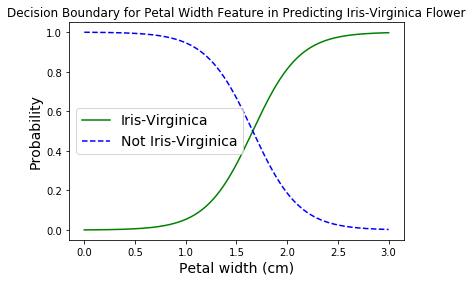

In [13]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt


# create a binary logistic model
iris = datasets.load_iris()
X = iris["data"][:, 3:]
y = (iris["target"] == 2).astype(np.int)

# train
log_reg = LogisticRegression(solver='lbfgs')
log_reg.fit(X, y)

# demo decision boundary
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris-Virginica")
plt.legend(loc="center left", fontsize=14)
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.title("Decision Boundary for Petal Width Feature in Predicting Iris-Virginica Flower")

The decision bounadry lyes at the intersection of the curve (p=.5), where there is an equal probability for classification.

## Running Logistic Regression through Sci-kit Learn's SGDClassifier

In [14]:
from sklearn.linear_model import SGDClassifier

# loss - the cost function (default == squared error)
# penalty - regularization to avoid overfittng
# learning_rate - the default learning rate is 'optimal', which makes the learning rate decreases as more
#                 and more updates are taken (variable learning rate)
sgd_lr = SGDClassifier(loss='log', penalty=None,
                       fit_intercept=True, max_iter=5,
                       learning_rate='constant', eta0=0.01)

# test the performance
sgd_lr.fit(X_train, y_train)
predictions = sgd_lr.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, predictions)
print(f'The ROC AUC on testing set is: {auc_score:.3f}')

The ROC AUC on testing set is: 0.700


/Users/danielm/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


## Training Logistic Regression with Regularization

By default scikit learn add an l2-penality, but this can be altered as well as tuned using $c$ (not $\alpha$).

In [15]:
# train the model with l1 regularization
l1_feature_selector = SGDClassifier(loss='log', penalty='l1',
                                    alpha=0.0001, fit_intercept=True,
                                    max_iter=5, learning_rate='constant',
                                    eta0=0.01)
l1_feature_selector.fit(X_train, y_train)

# test the performance
predictions = l1_feature_selector.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, predictions)
print(f'The ROC AUC on testing set is: {auc_score:.3f}')

The ROC AUC on testing set is: 0.698


/Users/danielm/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


In [16]:
# now that we have the model trained, transform the dataset to select
# the subset of features (and cooresponding data) from the original training set
non_zero_features = l1_feature_selector.coef_[l1_feature_selector.coef_ != 0]
print(f'Original features: {X_train.shape[1]}\nL1 subset features: {len(non_zero_features)}')

Original features: 2820
L1 subset features: 848


In [17]:
# we can view the top most "important" and "unimportant" features
argsorted_features = np.argsort(l1_feature_selector.coef_)

bottom_feature_loc = argsorted_features[0][:10]
top_feature_loc = argsorted_features[0][-10:]

bottom_features = l1_feature_selector.coef_[0][bottom_feature_loc]
top_features = l1_feature_selector.coef_[0][top_feature_loc]

print('Top feature locations:')
print(top_feature_loc)
print('Top features:')
print(top_features)

print()

print('Bottom feature locations:')
print(bottom_feature_loc)
print('Bottom features:')
print(bottom_features)

Top feature locations:
[2787 2634 2791  544 1229 2792  340  710 2318  332]
Top features:
[0.2676457  0.2676457  0.27298015 0.27712119 0.28401015 0.29508706
 0.29703416 0.2971603  0.31440656 0.33084284]

Bottom feature locations:
[2802 1684 2323  639  137  441 2532  716 2529  713]
Bottom features:
[-0.52964224 -0.45265284 -0.38691584 -0.36442899 -0.36442899 -0.33627522
 -0.31533644 -0.30064633 -0.28815729 -0.2797977 ]


## Training Large Scale Datasets with Online Learning

With online learning, we can partition our dataset into minibatches, and produce a model from each batch.

In [18]:
# grab a super large dataset
click_df = pd.read_csv(join(DATA_DIR, 'train.csv'), nrows=1000000)
click_df.drop(['id', 'hour', 'device_id', 'device_ip'], axis=1, inplace=True)
click_df = click_df.apply(LabelEncoder().fit_transform)
col_names = list(click_df)
X_names, y_names = list(filter(lambda name: name != 'click', col_names)), ['click']
X, y = np.array(click_df[X_names]), np.array(click_df[y_names])
X = OneHotEncoder().fit_transform(X)
y = y.reshape(1, len(y))[0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

/Users/danielm/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [19]:
import progressbar
import math

# initiate a model
sgd_lr = SGDClassifier(loss='log', penalty=None,
                       fit_intercept=True, max_iter=1,
                       learning_rate='constant', eta0=0.01)

# create a pairwise iterator for indexing
start, end, in_x_steps = 0, X_train.shape[0], 10
offset = math.floor((end - start) / in_x_steps)
my_iter = np.arange(start, end+offset, offset)
bar = progressbar.ProgressBar()

# online learning: mini-batch the model
start_time = timeit.default_timer()
for i, j in bar(zip(my_iter, my_iter[1:])):
    X_train_sub, y_train_sub = X_train[i:j, :], y_train[i:j]
    sgd_lr.partial_fit(X_train_sub, y_train_sub, classes=[0, 1])
time_end = timeit.default_timer() - start_time
print(f'Online training completed in {time_end:.3f} seconds')

# test the performance of the classifier
predictions = sgd_lr.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, predictions)
print(f'The ROC AUC on testing set is: {auc_score:.3f}')

/ |#                                                  | 0 Elapsed Time: 0:00:00/Users/danielm/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
| |   #                                               | 9 Elapsed Time: 0:00:00


Online training completed in 0.400 seconds
The ROC AUC on testing set is: 0.747


That's pretty fast!

## Multinomial Logistic Regression (aka Softmax Regression)

### Making the Predictions

Recall that in the binary case, we represented our model as 

$$P(y=1|x) = \frac{1}{1 + exp(-x w^T)}$$

which classifies an output as 1, given input x, parameterized by some set of weights to a value between 0 and 1. Naturally, since the probabilities must sum to 1, we inferred that

$$P(y=0|x) = 1 - \frac{1}{1 + exp(-x w^T)}$$

In the K-model case we include a score function $s_k(x)$, which computes a score _vector_ for each class $k$. Notice its similiarities to above.

$$s_k(x) = (w^k)^T \cdot x$$

So a weight vector is included per class. So we now have a big $W$ matrix. This weight matrix is the most crucial part, and is what we train to produce, using the data.

| class | w_1  | w_2  | w_3  | . | . | . | w_k  |
|-------|------|------|------|---|---|---|------| 
| 1     | w_11 | w_21 | w_31 | . | . | . | w_k1 | 
| 2     | w_12 |   .  |   .  | . | . | . | w_k2 | 
| 3     | w_13 |   .  |   .  | . | . | . | w_k3 | 
| .     | .    |   .  |   .  | . | . | . | .    | 
| .     | .    |   .  |   .  | . | . | . | .    | 
| .     | .    |   .  |   .  | . | . | . | .    | 
| k     | w_1n |   .  |   .  | . | . | . | w_kn | 


Then to compute the actual probability of a particular class, we take that score vector, and normalize it like this:

$$\hat{p_k} = P(y=k|x) = \frac{exp(s_k(x))}{\sum_{k=1}^K exp(s_k(x))}$$


This ensures that class $K$ (our target) given a particular input $x$ is normalized to a particular value between 0 and 1. 

Notice that $\sum_{j=1}^K exp(s_j(x))$ in the denominator sums over all the weight vectors in order to normalizes the probability of the specific k class, $exp(s_j(x))$ between a value of 0 and 1.

For example, if we were interested in the probability of class 1 occuring over the other 3 classes, our model would become

$$\hat{p_k} = P(y=1|x) = \frac{exp(s_1(x))}{exp(s_1(x)) + exp(s_2(x)) + exp(s_3(x))}$$

Conceptually, we have three possible events (1), (2) and (3), and so (1) + (2) + (3) must = 1 because they represented the entire probabilitiy space. Naturally then as (1) is weighted higher, then so will its probability of classification.

So at this point we have a way of outputing the probability of a particular $x$. Now to wrap everything up, we need to actually produce a (single) classification, so in order to do that, we take argmax to return the class with the highest estimated probability.

$$y' = \text{argmax}_k P(y=k|x')$$

### The Training Process

Our objective to produce a high probability for the target class, and low probability for the remaining other classes.

To achieve this, the _cross entropy_ function is minimized. Notice how when k=2, the cost function is equivalent to that of logistic regression.

$$J(W) = \frac{-1}{m} \sum_{i=1}^m \sum_{k=1}^K 1\{y^{(i)}=k\} log(\hat{p_k}^{(i)})$$


**Understanding the cost function**

The cost function many nested functions so lets back up and try to understand how this works. First of all, we can ignore the sum of K because all it does is identify what $k$ (class) matches with the actual class and zeros out everything else. This only happens once and zeros out the remaining occurances (just like in the binary case). The summation over $K$ is really just to identify the correct instance of the output class. What you get for example, is something like $0 + 0 + 0 + 0 + log(\hat{p_k}^{(i)}) + \dots + 0$. The zeros add no cost. Lets just chose a random class k=1. Now we can simplify this to:

$$J(W) = \frac{-1}{m} \sum_{i=1}^m log(\hat{p_1}^{(i)})$$

The cost function iterates through all the training instances (of size m), and just returns the average of the error. So lets break it down once again and just look at a particular training example because it just repeated logic. Lets pick a random training instance i=2.

$$J(W) = -log(\hat{p_1}^{(2)})$$

Now we know that $0 \le log(\hat{p_k}^{(i)}) \le 1$ becuase $\hat{p_k}^{(i)}$ is a normalized probability. Lets look at $-log(x)$ and see how this frames it.


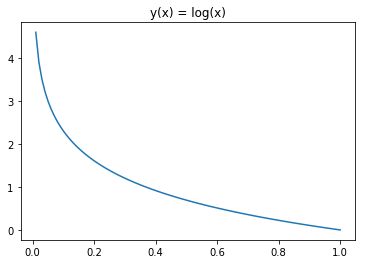

In [20]:
from myutils.draw.math import plt_2d_functions

plt_2d_functions([lambda x : -np.log(x)], x=np.arange(.01, 1+.01, .01), title='y(x) = log(x)')

Ok, so it looks like the log just reframes the probability in an exponential context. But from it, we can identify that if the output for a particular $\hat{p_k}^{(i)}$ is high (for the true class) then the cost is low, and vise versa. This is what we want because were defining a numerically higher cost in the context when the model is wrong and numerically lower cost when the model is correct.

Now lets fill in the nested functions of the cost function and see if we can uncover anything else. I am going to remove the log because all it does is provide a exponential reinterpretation on top of the probability.

$$J(W) = \frac{exp(s_1(x))}{\sum_{k=1}^K exp(s_k(x))}$$

$$J(W) = \frac{exp((w^k)^T \cdot x)}{\sum_{k=1}^K exp((w^k)^T \cdot x)}$$

This is good. It tells us why the weight matrix is nessessary. It also tells us how the $\hat{p}^k$ can return a high or low probability. Lets begin with the second point.

Lets begin with $exp((w^k)^T \cdot x)$, and see how this looks like. We know that $(w^k)^T \cdot x$ is just the linear summation of weights on top of each feature of the input $x$.

$$z = w_0 + x_1 w_1 + x_2 w_2 + x_3 w_3 + \dots + x_n w_n = \sum_{i=0}^n x_i w_i = x w^T$$

This means that can have any real value of x. This means that can have any real value of x. The $e$ just scales this value exponentially.

The expression simplifies to $\frac{a}{b}$, where $0 \le J(W) \le 1$ and $a < b$ since b contains a and because we know that $J(W)$ is a normalized probability. Utimately what is happening is that if the score is high in the numerator, the the ratio grows larger and a high probability is returned. And reframing this probability back into from before, we know that it produces a lower cost.

And secondly, notice how we are always just working with a particular $w$ vector, and not the matrix in its entirely. The matrix of weights is effectively a contain that we can pull $w$ vectors from. 

### ????

Does this mean that there is a single cost function for all classes, and $W$ is just initially several points that will descend down to its the minimum? Or does this mean that there is a cost function per class and that $W$ independently indexes the correct $w$ vector per appropriate cost function?

my guess is the secvond one because of the if condition from indicator
### ???


Finally to apply this algorithm in gradient descent is the same. We will needs its derivative. Ill include it here for reference, but will not derive it.



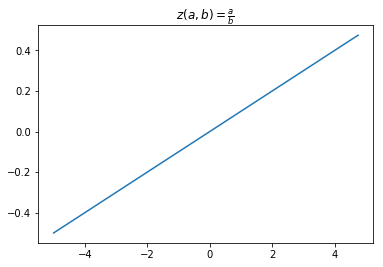

In [21]:
plt_2d_functions([lambda x: x / 10], x=np.arange(-5, 5, .25), title=r'$z(a,b) = \frac{a}{b}$')

And all this is saying is that 


We are describing an continuous space where given some $w$ we are saying "what does this give us"? Imagine we had a random initialization of $W$.  




Next, recall that our cost for a single sample was defined as:

$$J(w) = -[(y^{(i)}log(\hat{y}(x^{(i)})) + (1-y^{(i)})log(\hat{y}(x^{(i)}))]$$

Where we hard listed the cancelization on one or the other class.

In the multinomial case,

$$J(W) = -\sum_{j=1}^K 1\{y^{(i)}=j\}log(\hat{y_k}(x^{(i)})$$



Finally, we can derive the gradient descent step also similiarly to the binary case

$$\nabla w_j = \frac{1}{m} \sum_{i=0}^m (-1\{y^{(i)}=j\} + \hat{y_k}(x^{(i)}))x^{(i)}$$

which after every iteration step, all $w_j$ weight vectors get updated. After training, we will finally make our classification $\hat{y_k}$ by selecting the classification that gives rise to the greatest probability. In other words, 

### Multinomial Logisitic Regression with Newgroup Classification

In [22]:
# data source code adapted from NLTK chapter
import nltk
nltk.download('names')
nltk.download('punkt')
nltk.download('wordnet')

from nltk.corpus import names
from nltk.stem import WordNetLemmatizer
from sklearn.datasets import fetch_20newsgroups


groups = fetch_20newsgroups()
NAMES = set(names.words())

def my_filter(post):
    lemmatizer = WordNetLemmatizer()
    f1 = [word.lower() for word in nltk.tokenize.word_tokenize(post)]
    f2 = [word for word in f1 if word.isalpha() and word not in NAMES]
    return ' '.join(lemmatizer.lemmatize(word) for word in f2)


cleaned_posts = []
for post in groups.data:
    cleaned_posts.append(my_filter(post))

[nltk_data] Downloading package names to /Users/danielm/nltk_data...
[nltk_data]   Package names is already up-to-date!
[nltk_data] Downloading package punkt to /Users/danielm/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/danielm/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# vectorize and then split the data
tfidfv = TfidfVectorizer(sublinear_tf=True, 
                         max_df=0.5, 
                         stop_words='english', 
                         max_features=40000)
vect_posts = tfidfv.fit_transform(cleaned_posts)
X_train, X_test, y_train, y_test = train_test_split(vect_posts, groups.target, test_size=0.33, random_state=42)

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier


# grid search iteratables
parameters = {'penalty': ['l2', None], 
              'alpha': [1e-07, 1e-06, 1e-05, 1e-04], 
              'eta0': [0.01, 0.1, 1, 10]}

# now perform the model algorithm
sgd_lr = SGDClassifier(loss='log', learning_rate='constant', eta0=0.01, fit_intercept=True, max_iter=10)
grid_search = GridSearchCV(sgd_lr, parameters, n_jobs=-1, cv=3)
grid_search.fit(X_train, y_train)

print('Best model parameters discovered:')
print(grid_search.best_params_)

/Users/danielm/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


Best model parameters discovered:
{'alpha': 1e-06, 'eta0': 10, 'penalty': 'l2'}


In [25]:
sgd_lr_best = grid_search.best_estimator_
accuracy = sgd_lr_best.score(X_test, y_test)
print(f'The accuracy of our model is: {accuracy*100}%')

The accuracy of our model is: 91.5104445634708%


In [26]:
# todo

# what is the relationship between logistic regression and neural networks?
# explain why alternative loss parameter functions can be used (not just log)
# deper dive into how the vector algebra works (equivalent dot product with summations)
# testing the performance of a classifier with random forest decision tree important features (subset on the data with
# these features, and see how they perform.)